In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Conv2DTranspose, Reshape, BatchNormalization, Dropout, Input, ReLU, LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading and Preparing Cervical Cancer Images Dataset using Keras Image Data Generator
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_width, img_height = 256, 256
batchsize = 32

# Define the directories
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory="D:\TY S2\Research Paper\Cervical Cancer\Malhari Dataset\Malhari_Dataset_V1",
    target_size=(img_width, img_height),
    batch_size=batchsize,
    class_mode='categorical',  # or 'binary' if it's a binary classification
    subset='training'  # Only for training data
)

colposcopic_generator = train_datagen.flow_from_directory(
    directory="D:\TY S2\Research Paper\Cervical Cancer\Malhari Dataset\Malhari_Dataset_V1\colposcopic",
    target_size=(img_width, img_height),
    batch_size=batchsize,
    class_mode='categorical',  # or 'binary' if it's a binary classification
)

pap_generator = train_datagen.flow_from_directory(
    directory="D:\TY S2\Research Paper\Cervical Cancer\Malhari Dataset\Malhari_Dataset_V1\pap",
    target_size=(img_width, img_height),
    batch_size=batchsize,
    class_mode='categorical',  # or 'binary' if it's a binary classification
)

Found 452 images belonging to 2 classes.
Found 134 images belonging to 3 classes.
Found 318 images belonging to 4 classes.


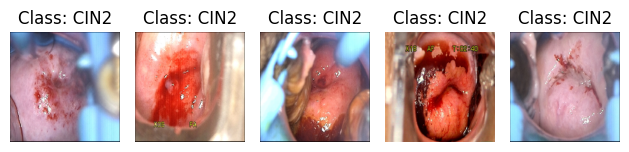

In [3]:
import matplotlib.pyplot as plt

# Define class labels
class_labels = ['CIN1', 'CIN2', 'CIN3']

# Get a batch of data from the generator
x_batch, y_batch = colposcopic_generator.next()

# Define the number of images to display
num_images_to_display = 5

# Display the images
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i+1)
    plt.imshow(x_batch[i])
    
    # Find the index of the class with the highest probability
    class_index = np.argmax(y_batch[i])
    
    plt.title(f'Class: {class_labels[class_index]}')
    plt.axis('off')

plt.tight_layout()
plt.savefig('class_labels_colposcope.png')
plt.show()

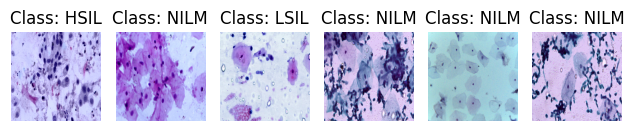

In [4]:
# Define class labels
class_labels = ['HSIL','LSIL','NILM','SSC']

# Get a batch of data from the generator
x_batch, y_batch = pap_generator.next()

# Define the number of images to display
num_images_to_display = 6

# Display the images
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i+1)
    plt.imshow(x_batch[i])
    
    # Find the index of the class with the highest probability
    class_index = np.argmax(y_batch[i])
    
    plt.title(f'Class: {class_labels[class_index]}')
    plt.axis('off')

plt.tight_layout()
plt.savefig('Class_label_pap.png')
plt.show()

In [5]:
img_width, img_height = 256, 256
batchsize = 32

train = keras. utils.image_dataset_from_directory(
    directory="D:\TY S2\Research Paper\Cervical Cancer\Malhari Dataset\Malhari_Dataset_V1",
    batch_size = batchsize,
    image_size = (img_width, img_height))

Found 452 files belonging to 2 classes.


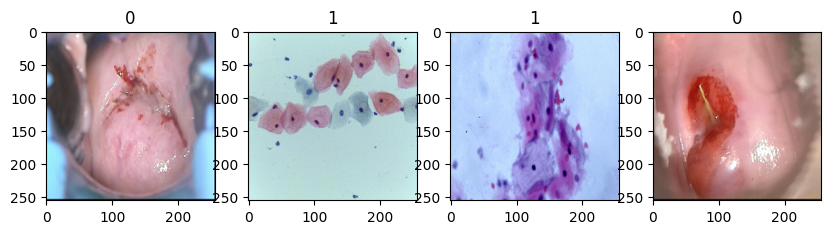

In [6]:
# Visualizing a Batch of Cervical Cancer Images

data_iterator = train.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(10,10))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [7]:
# generating augmented batches of cervical cancer images using ImageDataGenerator
DIR = "D:\TY S2\Research Paper\Cervical Cancer\Malhari Dataset\Malhari_Dataset_V1"

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(
        DIR,
        target_size = (64, 64),
        batch_size = batchsize,
        class_mode = None)

Found 452 images belonging to 2 classes.


In [8]:
# generator model 

KI = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
input_dim = 100

def Generator_Model():

    Generator = Sequential()

    # random noise
    Generator.add(Dense(8 * 8 * 512, input_dim = input_dim))
    Generator.add(ReLU())
    # convert 1d to 3d
    Generator.add(Reshape((8, 8, 512)))
    # Unsample
    Generator.add(Conv2DTranspose(256, (4, 4), strides=(2, 2), padding='same', kernel_initializer=KI, activation='ReLU'))
    Generator.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', kernel_initializer=KI, activation='ReLU'))
    Generator.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', kernel_initializer=KI, activation='ReLU'))
    Generator.add(Conv2D(3, (4, 4), padding='same', activation='sigmoid'))

    
    return Generator
    
generator = Generator_Model()
generator.summary()
# visualized layers of generator
keras.utils.plot_model(generator, show_shapes=True)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32768)             3309568   
                                                                 
 re_lu (ReLU)                (None, 32768)             0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 512)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 16, 16, 256)       2097408   
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 32, 32, 128)       524416    
 Transpose)                                                      
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 64, 64, 64)        

In [9]:
# creating the discriminator Model 

def Discriminator_Model():
    input_shape = (64, 64, 3)

    # Create a Sequential model
    discriminator = Sequential()
    discriminator.add(Conv2D(64,kernel_size=(3, 3), activation='LeakyReLU', input_shape = input_shape))
    discriminator.add(MaxPooling2D(pool_size=(2, 2)))
    discriminator.add(Conv2D(128, kernel_size=(3, 3), activation='LeakyReLU'))
    discriminator.add(MaxPooling2D(pool_size=(2, 2)))
    discriminator.add(Conv2D(256, kernel_size=(3, 3), activation='LeakyReLU'))
    discriminator.add(MaxPooling2D(pool_size=(2, 2)))
    discriminator.add(Flatten())
    discriminator.add(Dense(256, activation='LeakyReLU'))
    discriminator.add(Dense(1, activation='sigmoid'))

    return discriminator

# training The CNN
discriminator = Discriminator_Model()
discriminator.summary()  

# visualized Layers of discriminator
keras.utils.plot_model(discriminator, show_shapes=True)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 256)       

In [10]:
# DCGAN model training of Discriminator and Generator

class DCGAN(keras.Model):
    def __init__(self, generator, discriminator, latent_dim = input_dim):
        super().__init__()
        self.generator = generator
        self.discriminator = discriminator
        self.latent_dim = latent_dim
        self.g_loss_metric = keras.metrics.Mean(name='g_loss')
        self.d_loss_metric = keras.metrics.Mean(name='d_loss')
        
    @property
    def metrics(self):
        return [self.g_loss_metric, self.d_loss_metric]
    
    def compile(self, g_optimizer, d_optimizer, loss_fn):
        super(DCGAN, self).compile()
        self.g_optimizer = g_optimizer
        self.d_optimizer = d_optimizer
        self.loss_fn = loss_fn
        
    def train_step(self, real_images):
        # get batch size from the data
        batch_size = tf.shape(real_images)[0]
        # generate random noise
        random_noise = tf.random.normal(shape=(batch_size, self.latent_dim))
         # train the discriminator 
        with tf.GradientTape() as tape:
            # compute loss on real images
            pred_real = self.discriminator(real_images, training=True)
            # generate real image labels
            real_labels = tf.ones((batch_size, 1))
            # label smoothing
            real_labels += 0.05 * tf.random.uniform(tf.shape(real_labels))
            d_loss_real = self.loss_fn(real_labels, pred_real)
            
            # compute loss on fake images
            fake_images = self.generator(random_noise)
            pred_fake = self.discriminator(fake_images, training=True)
            # generate fake labels
            fake_labels = tf.zeros((batch_size, 1))
            d_loss_fake = self.loss_fn(fake_labels, pred_fake)
            
            # total discriminator loss
            d_loss = (d_loss_real + d_loss_fake) / 2
            
        # compute discriminator gradients
        gradients = tape.gradient(d_loss, self.discriminator.trainable_variables)
        # update the gradients
        self.d_optimizer.apply_gradients(zip(gradients, self.discriminator.trainable_variables))
        
        
        # train the generator model
        labels = tf.ones((batch_size, 1))
        # generator want discriminator to think that fake images are real
        with tf.GradientTape() as tape:
            # generate fake images from generator
            fake_images = self.generator(random_noise, training=True)
            # classify images as real or fake
            pred_fake = self.discriminator(fake_images, training=True)
            # compute loss
            g_loss = self.loss_fn(labels, pred_fake)
            
        # compute gradients
        gradients = tape.gradient(g_loss, self.generator.trainable_variables)
        # update the gradients
        self.g_optimizer.apply_gradients(zip(gradients, self.generator.trainable_variables))
        
        # update states for both models
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        
        return {'d_loss': self.d_loss_metric.result(), 'g_loss': self.g_loss_metric.result()}

In [11]:
# DCGAN Monitor for Image Generation and Model Saving

class DCGANMonitor(keras.callbacks.Callback):
    def __init__(self, num_imgs=25, latent_dim = input_dim):
        self.num_imgs = num_imgs
        self.latent_dim = latent_dim
        # create random noise for generating images
        self.noise = tf.random.normal([25, latent_dim])

    def on_epoch_end(self, epoch, logs = None):
        # generate the image from noise
        g_img = self.model.generator(self.noise)
        # denormalize the image
        g_img = (g_img * 255) + 255
        g_img.numpy()
        
    def on_train_end(self, logs = None):
        self.model.generator.save('DCGEN.h5')

In [12]:
# training DCGAN on i dataset for 30 epochs

epochs = 30
lr_g =0.0003
lr_d = 0.0001
beta = 0.5
latent_dim = 100

dcgan = DCGAN(generator=generator, discriminator=discriminator, latent_dim = latent_dim )
dcgan.compile(g_optimizer = Adam (learning_rate= lr_g, beta_1= beta), d_optimizer= Adam (learning_rate = lr_g , beta_1= beta), loss_fn = BinaryCrossentropy())

# fit the model and save the history
history = dcgan.fit(train_generator, epochs=epochs, callbacks=[DCGANMonitor()])


Epoch 1/30
15/15 [==============================] - 66s 4s/step - d_loss: 0.6616 - g_loss: 0.7149
Epoch 2/30
15/15 [==============================] - 62s 4s/step - d_loss: 0.6110 - g_loss: 0.8455
Epoch 3/30
15/15 [==============================] - 65s 4s/step - d_loss: 0.6159 - g_loss: 1.0282
Epoch 4/30
15/15 [==============================] - 60s 4s/step - d_loss: 0.5390 - g_loss: 0.9545
Epoch 5/30
15/15 [==============================] - 65s 4s/step - d_loss: 0.4858 - g_loss: 1.2217
Epoch 6/30
15/15 [==============================] - 62s 4s/step - d_loss: 0.3624 - g_loss: 1.2249
Epoch 7/30
15/15 [==============================] - 61s 4s/step - d_loss: 0.4095 - g_loss: 1.3298
Epoch 8/30
15/15 [==============================] - 61s 4s/step - d_loss: 0.3354 - g_loss: 1.5123
Epoch 9/30
15/15 [==============================] - 60s 4s/step - d_loss: 0.2110 - g_loss: 1.9677
Epoch 10/30
15/15 [==============================] - 61s 4s/step - d_loss: 0.2245 - g_loss: 1.8817
Epoch 11/30
15/15 

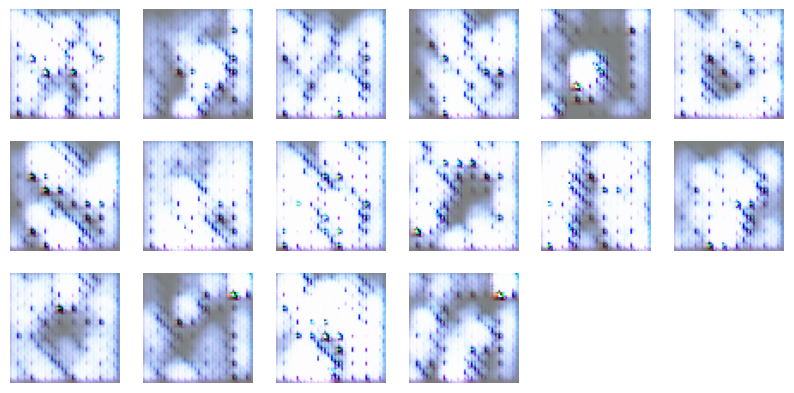

In [23]:
# generating 16 random images with DCGAN

plt.figure(figsize=(10, 10))
batch_s = 32
for i in range(16):
    plt.subplot(6, 6, i + 1)
    # Generate random noise for each image
    noise = tf.random.normal([batch_s,100])
    mg = dcgan.generator(noise)
    # Denormalize
    mg = (mg * 255) + 255

    mg.numpy()
    image = Image.fromarray(np.uint8(mg[0]))

    plt.imshow(image)
    plt.axis('off')

plt.show()

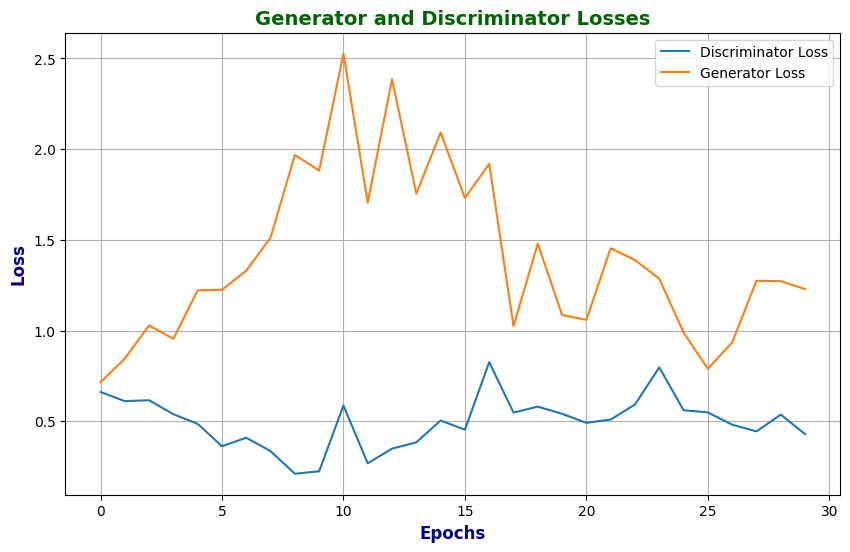

In [25]:
def create_loss_figure(d_loss_values, g_loss_values):
    plt.figure(figsize=(10, 6))
    plt.plot(d_loss_values, label='Discriminator Loss')
    plt.plot(g_loss_values, label='Generator Loss')
    plt.title('Generator and Discriminator Losses', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
    plt.xlabel('Epochs', fontsize = 12, fontweight = 'bold', color = 'darkblue')
    plt.ylabel('Loss', fontsize = 12, fontweight = 'bold', color = 'darkblue')
    plt.legend()
    plt.grid(True)
    plt.savefig('Generator and Discriminator Losses.png')
    plt.show()

# access the loss values from the history
d_loss_values = history.history['d_loss']
g_loss_values = history.history['g_loss']

# call the create_loss_figure function with the loss values
create_loss_figure(d_loss_values, g_loss_values)